# 03.2 — Pandas: Pivot Tables, Correlation & Covariance

This notebook covers **summarization and statistical relationships** in Pandas:

- `pd.pivot_table()` for summarizing data
- `.corr()` for correlations (default = Pearson)
- `.cov()` for covariance
- Heatmaps for visualizing correlation matrices

Dataset used: **Titanic** (loaded from GitHub). This notebook is Google Colab-ready.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pivot Tables

- Use `pd.pivot_table()` to create summaries by rows and columns.
- Similar to Excel pivot tables.


In [2]:
# Average fare by Pclass and Sex
pivot = pd.pivot_table(df, values='Fare', index='Pclass', columns='Sex', aggfunc='mean')
print(pivot)

# Survival rate by Pclass and Sex
pivot_survival = pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print('\nSurvival rate pivot:')
print(pivot_survival)

Sex         female       male
Pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633

Survival rate pivot:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


## Correlation

- `.corr()` computes pairwise correlations of numerical columns.
- Default method = Pearson correlation.


In [3]:
# Correlation of numeric columns
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

# Correlation of Age and Fare
print('\nCorrelation Age vs Fare:', df['Age'].corr(df['Fare']))

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

Correlation Age vs Fare: 0.0960666917690389


## Covariance

- `.cov()` measures joint variability of numeric columns.
- Values depend on units (not normalized like correlation).


In [4]:
cov_matrix = df.cov(numeric_only=True)
print(cov_matrix)

# Covariance of Age and Fare
print('\nCovariance Age vs Fare:', df['Age'].cov(df['Fare']))

              PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846  

Covariance Age vs Fare: 73.84902981461926


## Heatmap of Correlation Matrix

- Use Seaborn `heatmap` to visualize correlations.


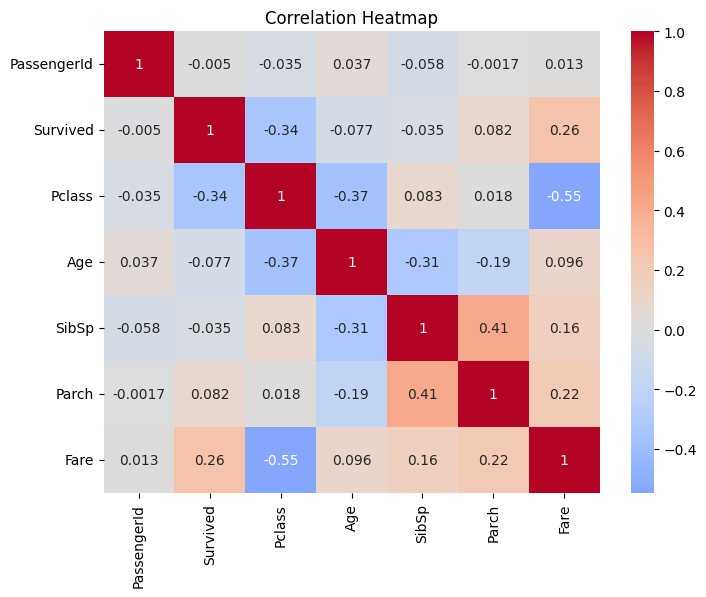

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Best Practices

- Use pivot tables for quick summaries by groups.
- Correlation shows *strength and direction* of linear relationships.
- Covariance is less interpretable across features with different scales.
- Heatmaps are great for spotting patterns visually.


## Exercises

1. Create a pivot table of average Age by Pclass and Sex.
2. Find the correlation between `Pclass` and `Survived`.
3. Compute the covariance between `Fare` and `Age`.
4. Plot a heatmap of correlations only for `Age`, `Fare`, and `Survived`.
